In [ ]:
!pip uninstall --yes tensorboard tb-nightly

!pip install --quiet tensorflow-federated
!pip install --quiet --upgrade nest-asyncio
!pip install --quiet --upgrade tb
!pip install --quiet --upgrade numpy

import nest_asyncio
nest_asyncio.apply()

In [ ]:
import collections
import random

import numpy as np
import tensorflow as tf
import tensorflow_federated as tff
import matplotlib.pyplot as plt

np.random.seed(0)

In [ ]:
cifar_train, cifar_test = tff.simulation.datasets.cifar100.load_data()

In [ ]:
NUM_CLIENTS = len(cifar_train.client_ids)
NUM_EPOCHS = 10
BATCH_SIZE = 20
SHUFFLE_BUFFER = 100
PREFETCH_BUFFER = 10

def preprocess(dataset):

  def batch_format_fn(element):
    return collections.OrderedDict(
        x=tf.reshape(element['image'], [-1, 32, 32, 3]),
        y=tf.reshape(element['label'], [-1, 1]))

  return dataset.repeat(NUM_EPOCHS).shuffle(SHUFFLE_BUFFER, seed=1).batch(
      BATCH_SIZE).map(batch_format_fn).prefetch(PREFETCH_BUFFER)

In [ ]:
def make_federated_data(client_data, client_ids):
  return [
      preprocess(client_data.create_tf_dataset_for_client(x))
      for x in client_ids
  ]

def getSampleOfClients(numberOfClients, maxClients, clientsIds):
  indeces = random.sample(range(0, maxClients), numberOfClients)
  clients = []
  for i in indeces:
    clients.append(clientsIds[i])

  return clients

In [ ]:
def create_keras_model():
  return tf.keras.applications.MobileNetV2((32, 32, 3), classes=100, weights=None)

In [ ]:
def model_fn():
  keras_model = create_keras_model()
  return tff.learning.from_keras_model(
      keras_model,
      input_spec=preprocessed_example_dataset.element_spec,
      loss=tf.keras.losses.SparseCategoricalCrossentropy(),
      metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])

In [ ]:
iterative_process = tff.learning.build_federated_averaging_process(
    model_fn,
    client_optimizer_fn=lambda: tf.keras.optimizers.SGD(learning_rate=0.02),
    server_optimizer_fn=lambda: tf.keras.optimizers.SGD(learning_rate=1.0))

Instructions for updating:
Colocations handled automatically by placer.


Instructions for updating:
Colocations handled automatically by placer.


In [ ]:
state = iterative_process.initialize()
NUM_ROUNDS = 100
for round_num in range(NUM_ROUNDS):
  federated_train_data = make_federated_data(cifar_train, getSampleOfClients(20, NUM_CLIENTS, cifar_train.client_ids))
  state, metrics = iterative_process.next(state, federated_train_data)
  print('round {:2d}, metrics={}'.format(round_num, metrics))

round  0, metrics=OrderedDict([('broadcast', ()), ('aggregation', OrderedDict([('mean_value', ()), ('mean_weight', ())])), ('train', OrderedDict([('sparse_categorical_accuracy', 0.2543), ('loss', 2.9862854)])), ('stat', OrderedDict([('num_examples', 20000)]))])
round  1, metrics=OrderedDict([('broadcast', ()), ('aggregation', OrderedDict([('mean_value', ()), ('mean_weight', ())])), ('train', OrderedDict([('sparse_categorical_accuracy', 0.27285), ('loss', 2.8300195)])), ('stat', OrderedDict([('num_examples', 20000)]))])
round  2, metrics=OrderedDict([('broadcast', ()), ('aggregation', OrderedDict([('mean_value', ()), ('mean_weight', ())])), ('train', OrderedDict([('sparse_categorical_accuracy', 0.21445), ('loss', 3.1255538)])), ('stat', OrderedDict([('num_examples', 20000)]))])
round  3, metrics=OrderedDict([('broadcast', ()), ('aggregation', OrderedDict([('mean_value', ()), ('mean_weight', ())])), ('train', OrderedDict([('sparse_categorical_accuracy', 0.2437), ('loss', 2.9375021)])), (

In [ ]:
(cifar_tTrain, cifar_tTainLabels), (cifar_tTest, cifar_tTestLabels) = tf.keras.datasets.cifar100.load_data()

169009152/169001437 [==============================] - 2s 0us/step


In [ ]:
tModel = tf.keras.applications.MobileNetV2((32, 32, 3), classes=100, weights=None)

tModel.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = tModel.fit(cifar_tTrain, cifar_tTainLabels, epochs=10, 
                    validation_data=(cifar_tTest, cifar_tTestLabels), batch_size=96)

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/backend.py:4930: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


521/521 [==============================] - 404s 766ms/step - loss: 4.3362 - accuracy: 0.0498 - val_loss: 4.6526 - val_accuracy: 0.0100
Epoch 2/10
521/521 [==============================] - 394s 756ms/step - loss: 3.8688 - accuracy: 0.0992 - val_loss: 4.8459 - val_accuracy: 0.0100
Epoch 3/10
521/521 [==============================] - 393s 753ms/step - loss: 3.7868 - accuracy: 0.1145 - val_loss: 4.9111 - val_accuracy: 0.0100
Epoch 4/10
521/521 [==============================] - 393s 754ms/step - loss: 3.7458 - accuracy: 0.1286 - val_loss: 5.0758 - val_accuracy: 0.0100
Epoch 5/10
521/521 [==============================] - 391s 750ms/step - loss: 3.5077 - accuracy: 0.1590 - val_loss: 5.1627 - val_accuracy: 0.0100
Epoch 6/10
521/521 [==============================] - 391s 750ms/step - loss: 3.4078 - accuracy: 0.1762 - val_loss: 5.1890 - val_accuracy: 0.0100
Epoch 7/10
521/521 [==============================] - 391s 750ms/step - loss: 3.6688 - accuracy: 0.1386 - val_loss: 5.0143 - val_accura

In [ ]:
test_loss, test_acc = tModel.evaluate(cifar_tTest,  cifar_tTestLabels, verbose=2)

NameError: ignored

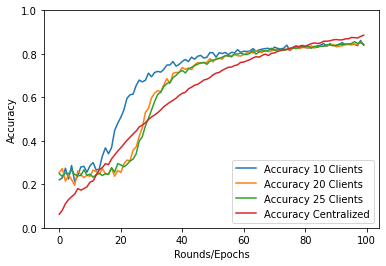

In [ ]:
accTen = [0.2206,0.2296,0.2739,0.2236,0.2867,0.2127,0.2391,0.2796,0.2826,0.2558,0.2856,0.3001,0.2653,0.2706,0.3295,0.3678,0.3406,0.3683,0.4475,0.4807,0.5077,0.5413,0.5949,0.612,0.6144,0.6542,0.6794,0.671,0.6783,0.7114,0.6947,0.7141
       ,0.7193,0.7159,0.7288,0.7484,0.7491,0.7643,0.7433,0.7518,0.7651,0.774,0.7644,0.7849,0.7753,0.789,0.7927,0.7808,0.7841,0.8063,0.8044,0.7846,0.805,0.8015,0.8063,0.7961,0.8068,0.8049,0.8193,0.8065,0.8119,0.811,0.8126,0.8243
       ,0.812,0.8183,0.8218,0.8243,0.8254,0.8184,0.831,0.8252,0.8225,0.8258,0.8401,0.8148,0.8294,0.8369,0.8273,0.8367,0.8293,0.8273,0.8288,0.8317,0.8371,0.84,0.8476,0.8343,0.8469,0.8389,0.8383,0.8413,0.8518,0.8428,0.8437,0.842
       ,0.8439,0.8377,0.8618, 0.8392]

accTwenty = [0.2543,0.27285,0.21445,0.2437,0.22145,0.19535,0.2615,0.2445,0.23075,0.24105,0.23715,0.26535,0.25805,0.24775,0.27195,0.24865,0.2474,0.27425,0.2371,0.26375,0.25415,0.2939,0.31135,0.30775,0.3571,0.3719,0.42045
             ,0.46015,0.53075,0.5489,0.59755,0.61935,0.63095,0.62485,0.6581,0.6858,0.6636,0.71065,0.7144,0.71405,0.7374,0.72835,0.735,0.7273,0.74945,0.75955,0.7557,0.75975,0.7606,0.77855,0.7627,0.77795,0.78015,0.77535,0.79255
             ,0.78765,0.79165,0.7966,0.7914,0.78975,0.79665,0.80375,0.81045,0.8032,0.8151,0.808,0.8066,0.81665,0.80975,0.81315,0.82,0.81905,0.81945,0.81575,0.82,0.81775,0.82435,0.83045,0.8234,0.8292,0.8292,0.8268,0.8375
             ,0.8263,0.83255,0.8356,0.83485,0.83745,0.84035,0.84365,0.83275,0.8349,0.837,0.8424,0.8441,0.84275,0.8453,0.84295,0.85375,0.8427]
accTwentyFive = [0.24856,0.236,0.252,0.24832,0.26496,0.2452,0.23972,0.24012,0.2668,0.24144,0.24676,0.23256,0.24456,0.25056,0.24036,0.24888,0.24548,0.27652,0.25572,0.29508,0.28956,0.28028,0.29096,0.30712,0.31568,0.33996,
                 0.39884,0.41892,0.46808,0.50328,0.54184,0.58036,0.6132,0.6236,0.6494,0.66348,0.669,0.69108,0.70128,0.71592,0.72368,0.7122,0.7302,0.73752,0.74552,0.75208,0.75904,0.76008,0.75212,0.76616,0.7714,0.77416,
                 0.77908,0.78448,0.79144,0.79204,0.78592,0.79976,0.79916,0.80344,0.7978,0.7966,0.8026,0.81516,0.79848,0.80996,0.81412,0.81228,0.81564,0.8254,0.81588,0.8188,0.82228,0.81576,0.82092,0.82228,0.82764,0.82444,
                 0.82924,0.83232,0.83204,0.8358,0.82592,0.8348,0.83012,0.8358,0.8348,0.84172,0.84204,0.83716,0.83932,0.84488,0.84208,0.84512,0.84508,0.84736,0.85608,0.8492,0.85056,0.84344]

accOne = [0.06232000142335892, 0.08141999691724777, 0.11104000359773636, 0.12977999448776245, 0.1430400013923645, 0.15449999272823334, 0.18050000071525574, 0.17336000502109528, 0.18017999827861786, 0.18860000371932983, 
          0.20997999608516693, 0.21578000485897064, 0.24164000153541565, 0.26725998520851135, 0.2768999934196472, 0.2948800027370453, 0.2906399965286255, 0.31676000356674194, 0.33489999175071716, 0.35275998711586, 
          0.36796000599861145, 0.3849399983882904, 0.40174001455307007, 0.41642001271247864, 0.4310399889945984, 0.4450399875640869, 0.46375998854637146, 0.47224000096321106, 0.48302000761032104, 0.49796000123023987, 
          0.509660005569458, 0.5185199975967407, 0.5293200016021729, 0.5421599745750427, 0.5573599934577942, 0.5674399733543396, 0.5779200196266174, 0.5863199830055237, 0.5961999893188477, 0.6088200211524963, 
          0.6184800267219543, 0.6233999729156494, 0.6388000249862671, 0.6466400027275085, 0.6558799743652344, 0.6597200036048889, 0.6690199971199036, 0.6796000003814697, 0.6832799911499023, 0.6909599900245667, 
          0.7033399939537048, 0.7113199830055237, 0.7142999768257141, 0.7244200110435486, 0.7313200235366821, 0.7383400201797485, 0.7389799952507019, 0.7459999918937683, 0.7495200037956238, 0.760699987411499, 
          0.7620599865913391, 0.7680000066757202, 0.7734599709510803, 0.7812600135803223, 0.7869600057601929, 0.7847399711608887, 0.7928000092506409, 0.7987200021743774, 0.7923799753189087, 0.8023599982261658, 
          0.8041999936103821, 0.8113399744033813, 0.8149999976158142, 0.8204399943351746, 0.8205000162124634, 0.8255599737167358, 0.8291000127792358, 0.8343200087547302, 0.8341599702835083, 0.8389000296592712, 
          0.8355000019073486, 0.8407599925994873, 0.8469799757003784, 0.8503000140190125, 0.847760021686554, 0.8503000140190125, 0.8580999970436096, 0.8579999804496765, 0.8597599864006042, 0.8640599846839905, 
          0.8658999800682068, 0.8641800284385681, 0.8642799854278564, 0.8688799738883972, 0.8691800236701965, 0.875, 0.8747000098228455, 0.872759997844696, 0.8798800110816956, 0.8855199813842773]

plt.plot(accTen, label='Accuracy 10 Clients')
plt.plot(accTwenty, label='Accuracy 20 Clients')
plt.plot(accTwentyFive, label='Accuracy 25 Clients')
plt.plot(accOne, label='Accuracy Centralized')
plt.xlabel('Rounds/Epochs')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')